In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Ignore all warnings globally
warnings.filterwarnings("ignore")

# Your code here

In [2]:
# load data
df=pd.read_csv('E:\\final_sem\\project\\healthcare-dataset-stroke-data.csv')

In [3]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### discription of coloum


Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## FEATURE ENINEERING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#body mass index has 201 null values 

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# eda

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 

In [8]:
df.duplicated().sum()

0

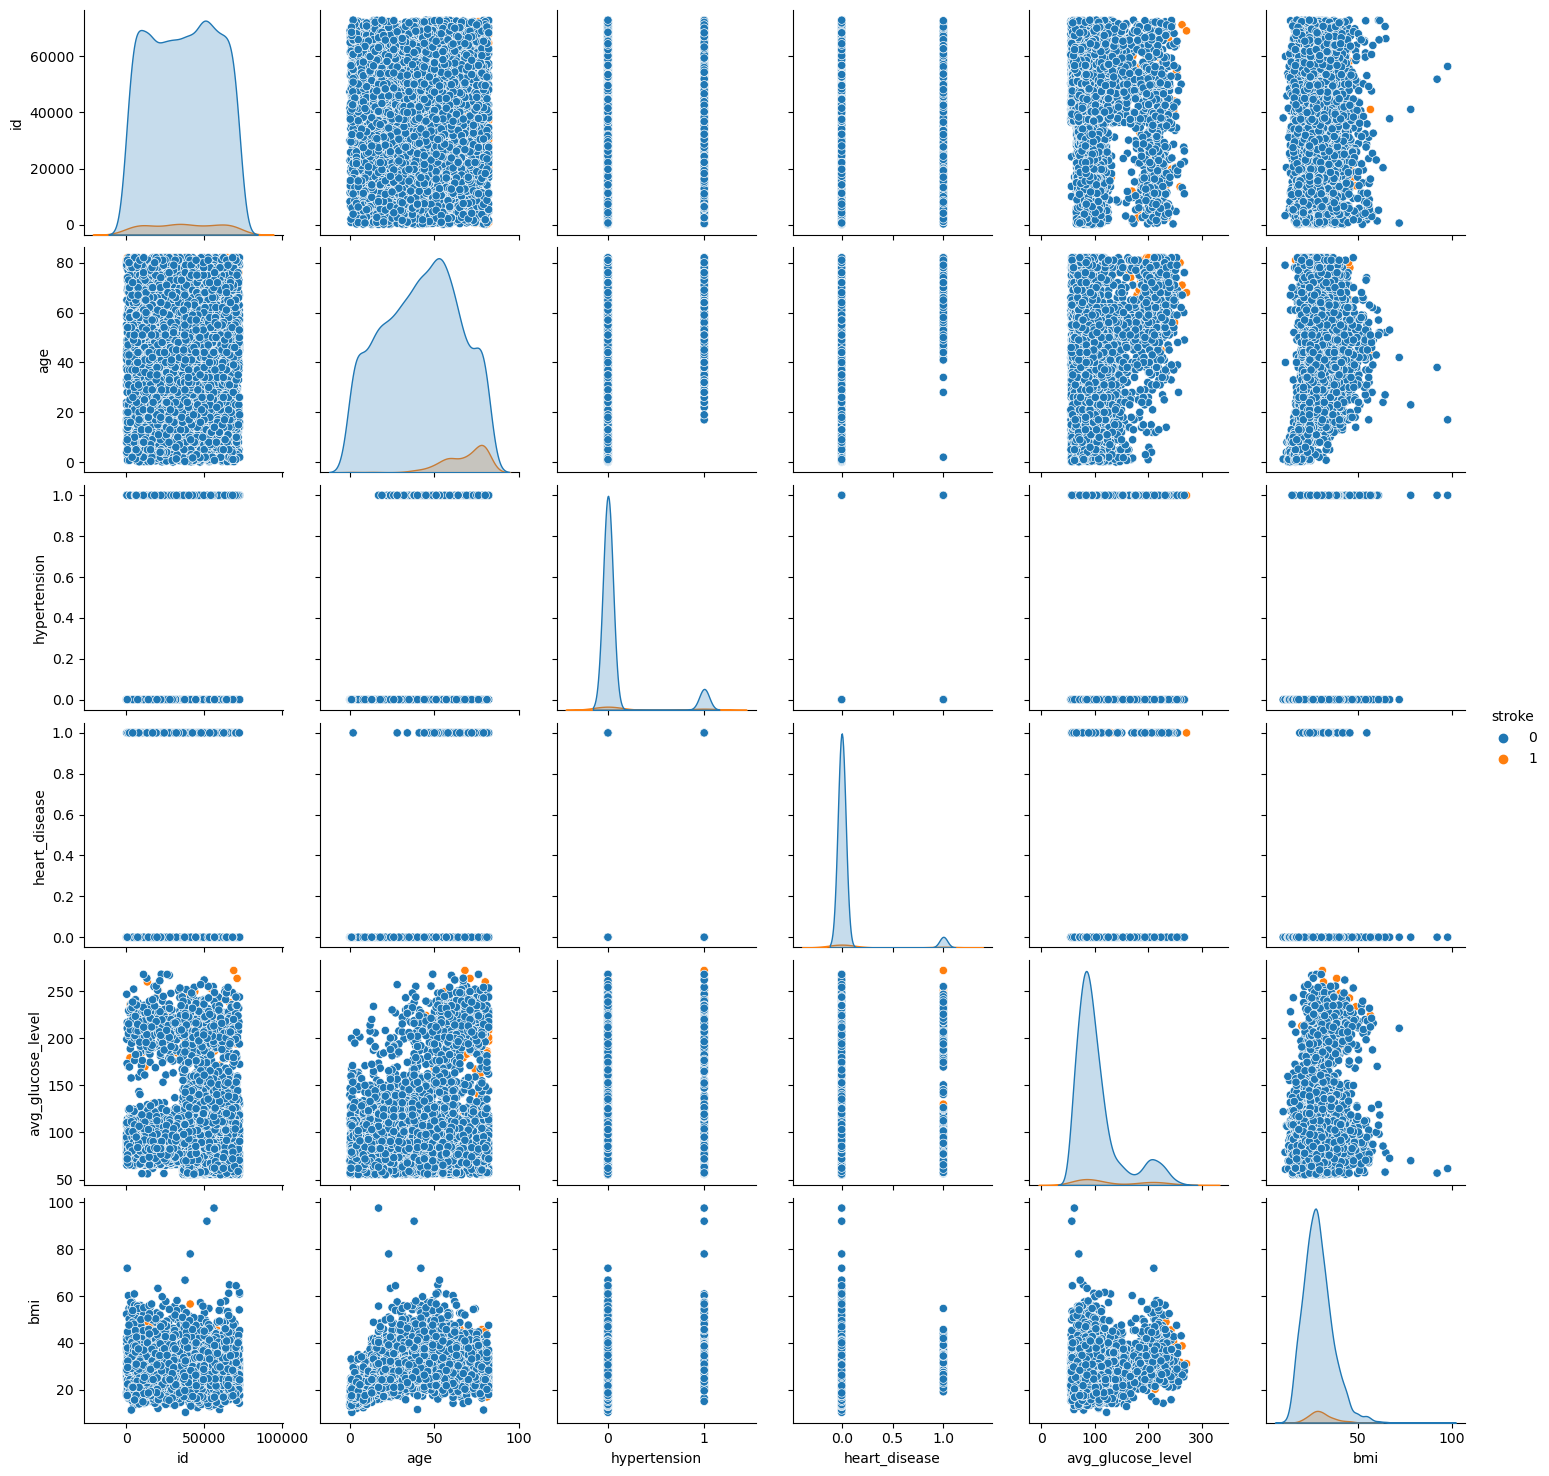

In [9]:
sns.pairplot(df,hue='stroke')

In [10]:
numerical_features=df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [11]:
numerical_features.head(3)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1


In [12]:
categorical_features.head(3)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked


### numerical features

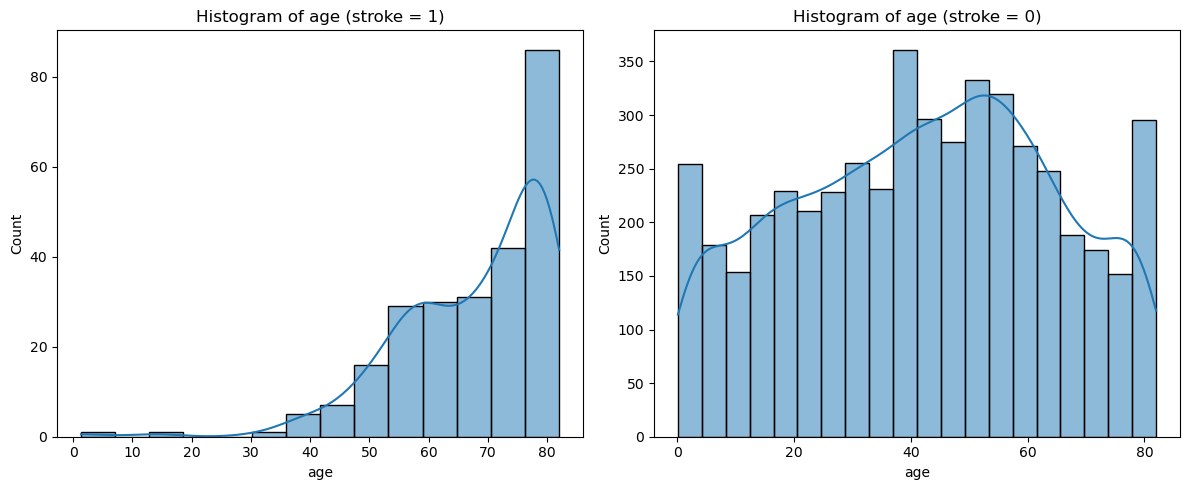

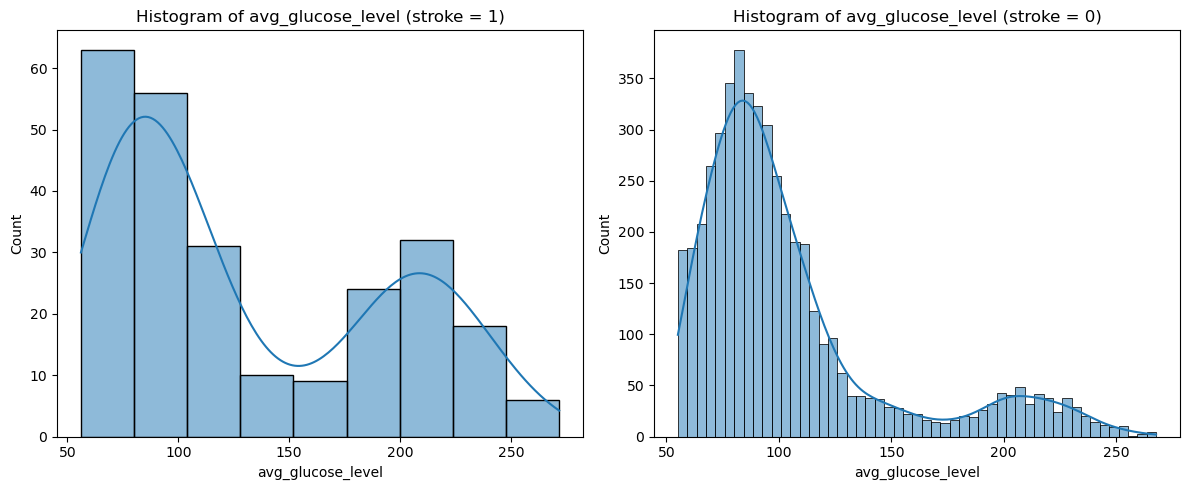

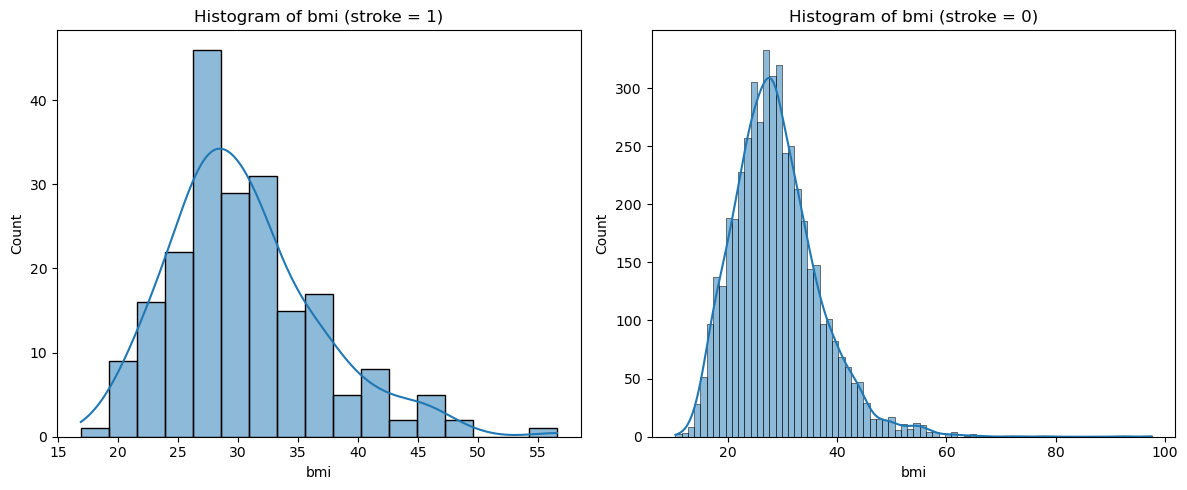

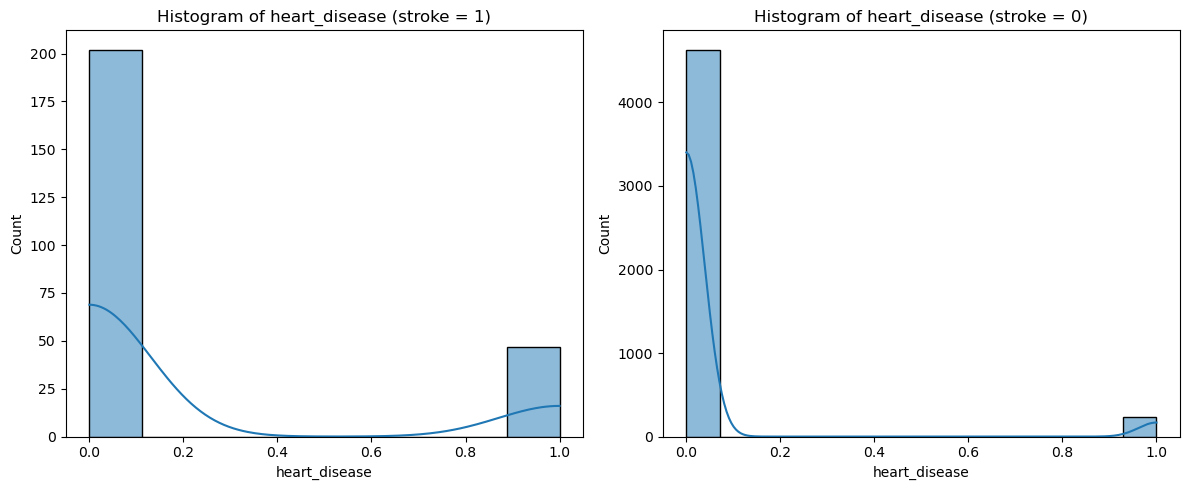

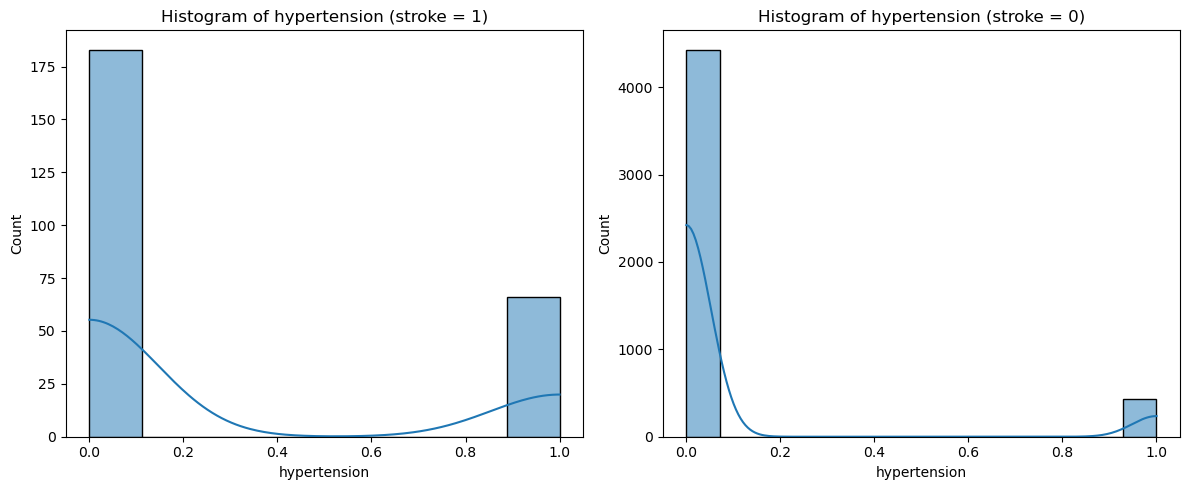

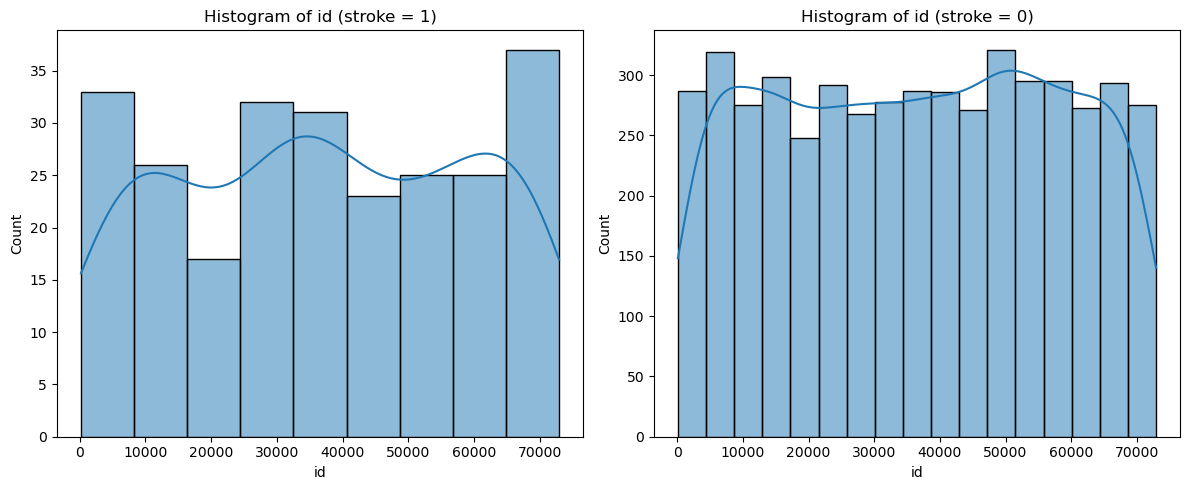

In [13]:

def plot_histograms_by_stroke(df):
   
    # Extract numerical columns (excluding 'stroke')
    numerical_columns = df.select_dtypes(include=['number']).columns.difference(['stroke'])

    # Iterate over numerical columns
    for column in numerical_columns:
        # Create a figure with two subplots (1 row, 2 columns)
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Subplot 1: Histogram when 'stroke' is 1
        sns.histplot(df[df['stroke'] == 1][column], kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {column} (stroke = 1)')

        # Subplot 2: Histogram when 'stroke' is 0
        sns.histplot(df[df['stroke'] == 0][column], kde=True, ax=axes[1])
        axes[1].set_title(f'Histogram of {column} (stroke = 0)')

        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()

# Example usage:
# Assuming 'df' is your DataFrame with numerical features and 'stroke' column
plot_histograms_by_stroke(df)


### insights 
age:60 to close to 80  50% fall who has stoke.so most of  50% people effected at age 60 around 80
 

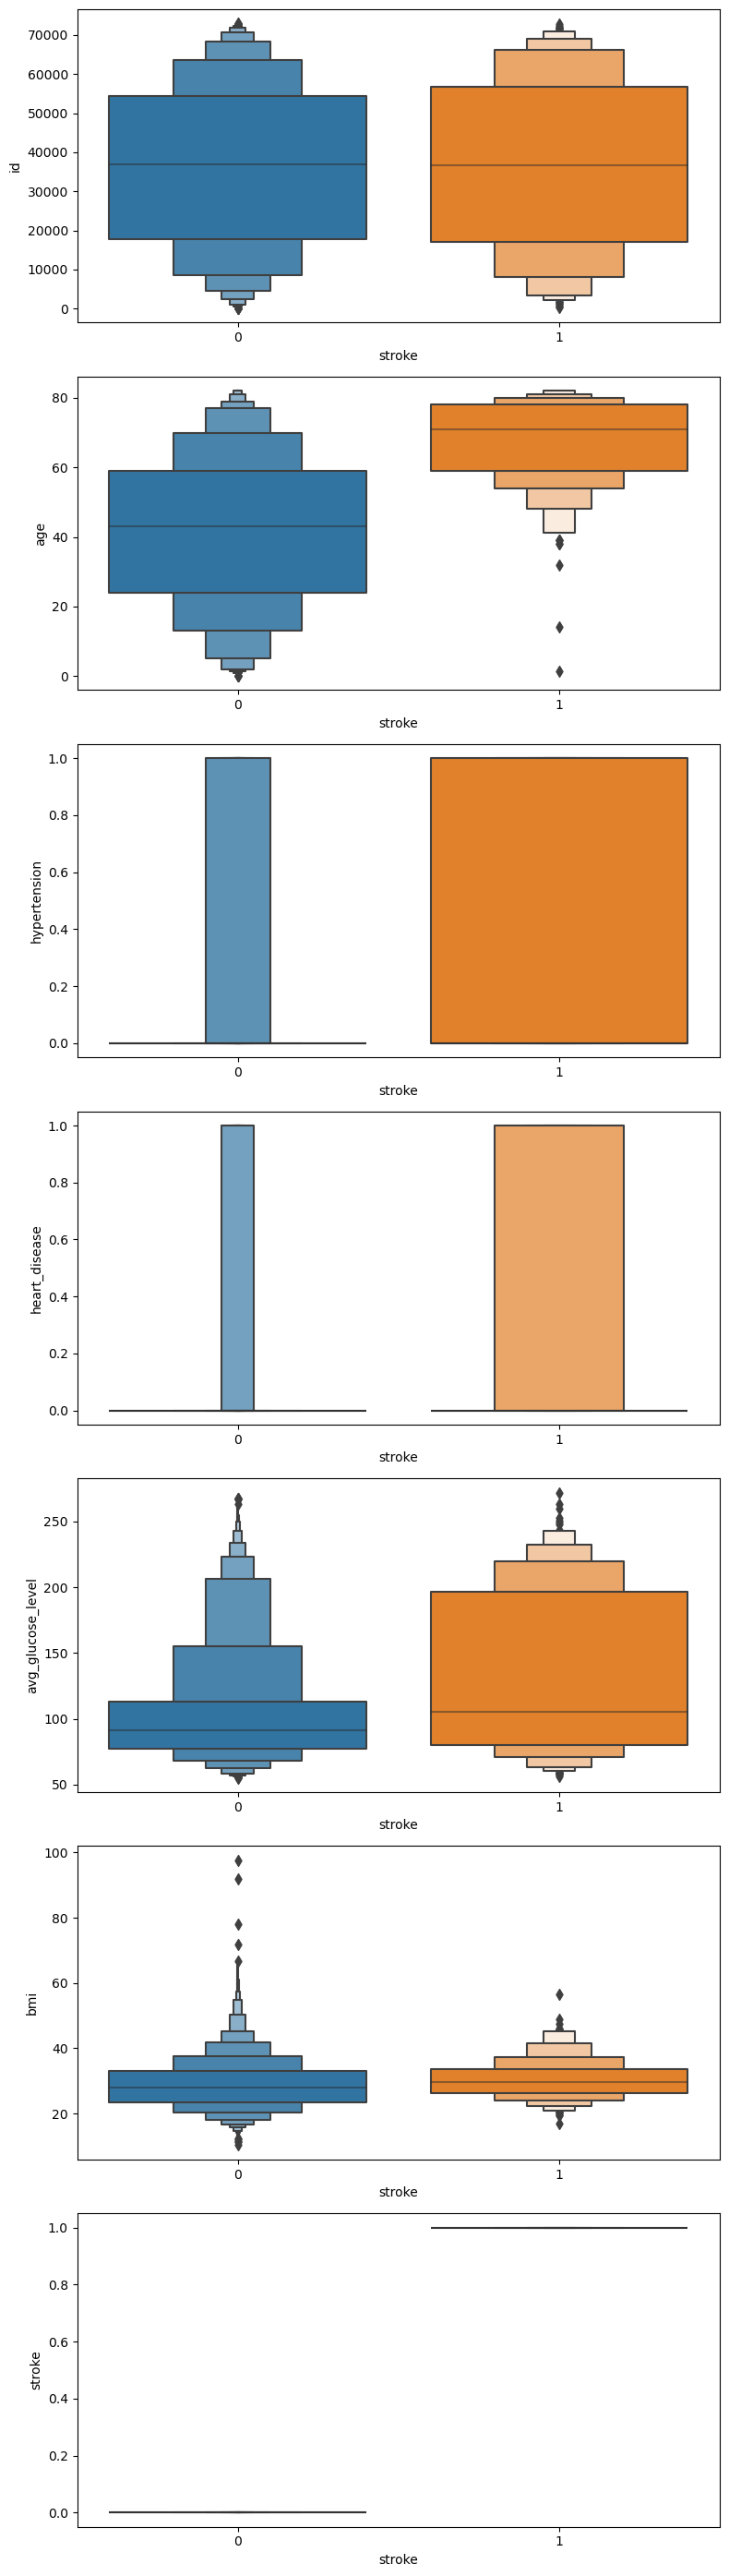

In [14]:

def plot_boxenplot_by_stroke(df):
    # Extract numerical columns (excluding 'stroke')
    numerical_columns = df.select_dtypes(include=['number']).columns

    # Create subplots
    fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 4 * len(numerical_columns)))

    # Iterate over numerical columns
    for i, column in enumerate(numerical_columns):
        sns.boxenplot(x='stroke', y=column, data=df, ax=axes[i])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame with numerical features and 'stroke' column
plot_boxenplot_by_stroke(df)


### categorical 

In [15]:
categorical_features.head(2)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked


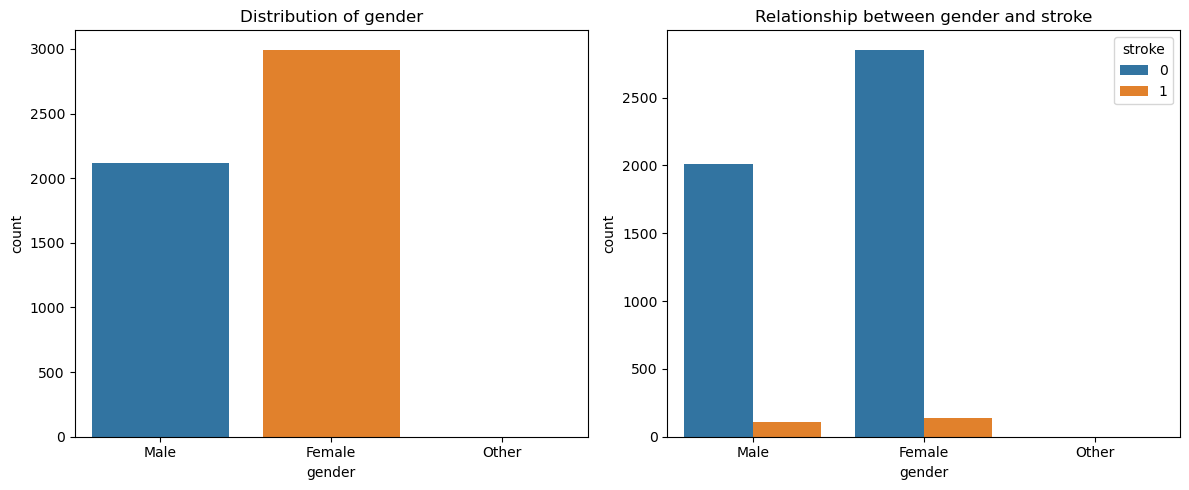

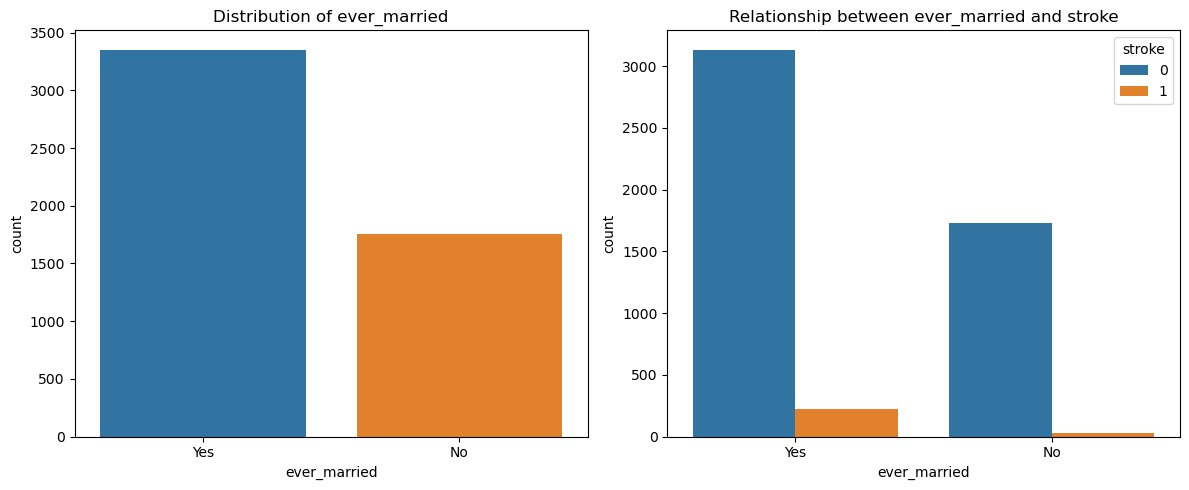

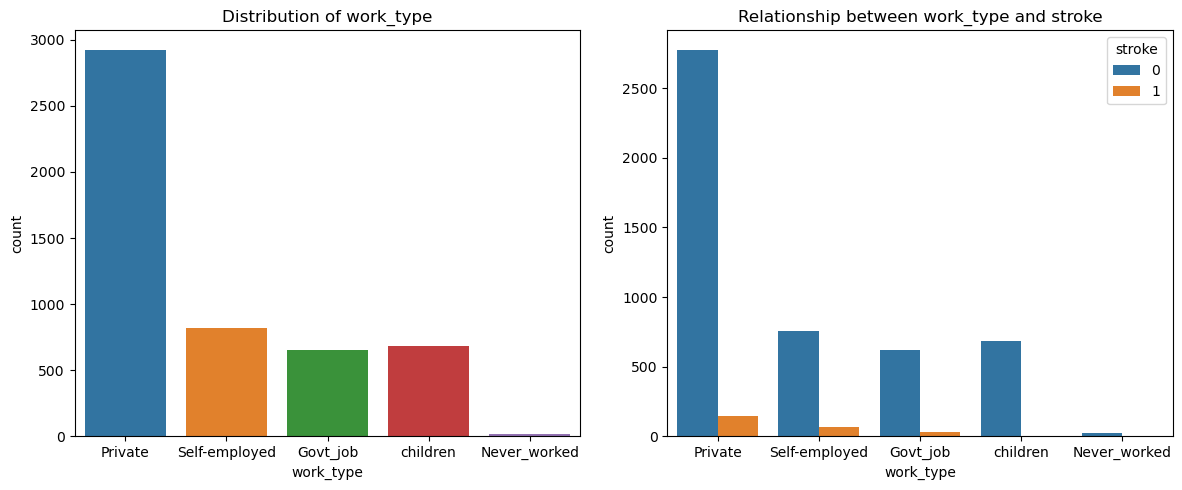

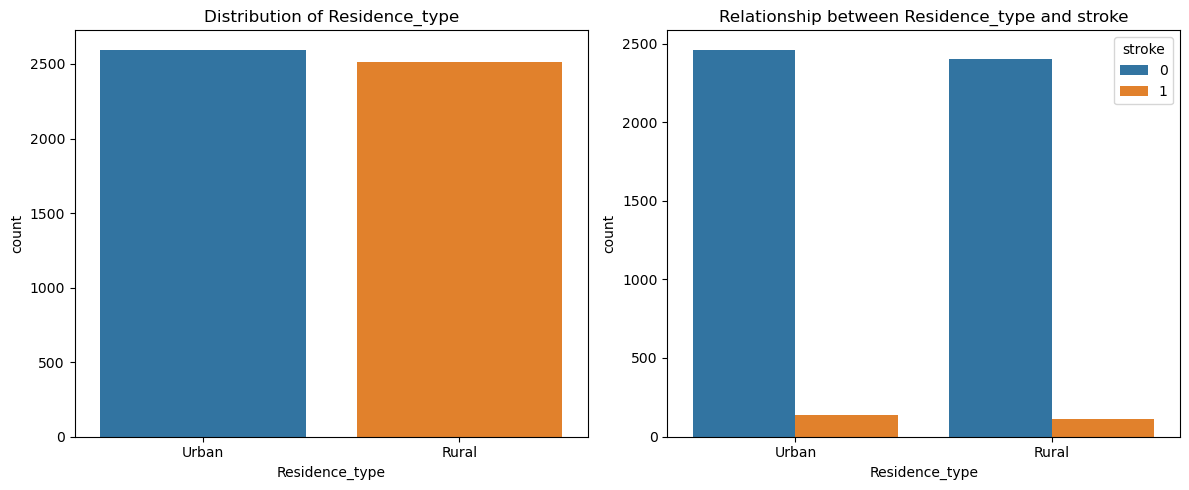

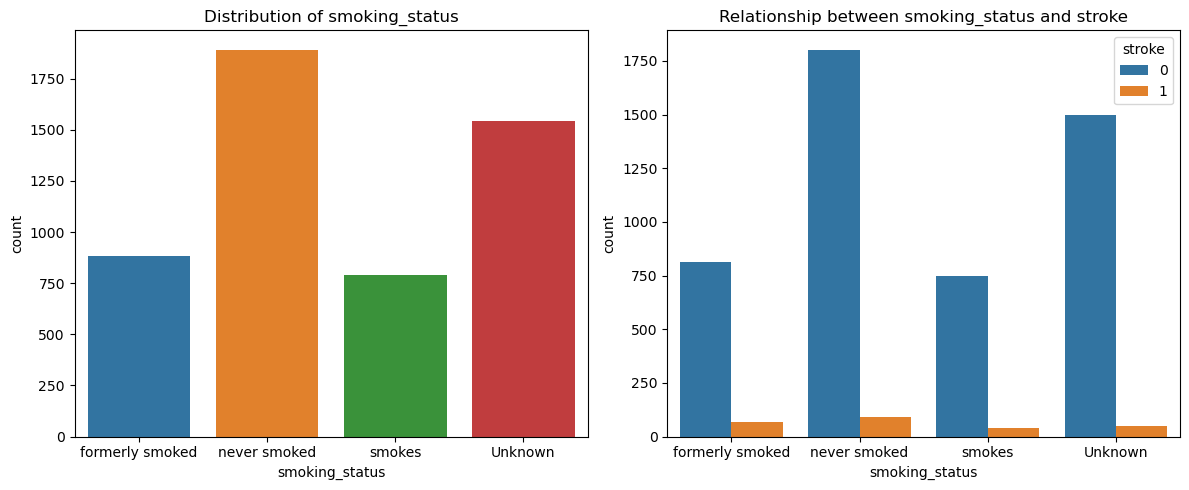

"'def plot_cat_feature(df, cat_features, target_feature):\n \n    for cat_feature in cat_features:\n        # Set up the first subplot for distribution\n        plt.figure(figsize=(12,5))\n        plt.subplot(1, 2, 1)\n        sns.countplot(x=cat_feature, data=df)\n        plt.title(f'Distribution of {cat_feature}')\n\n        # Set up the second subplot for relationship\n        plt.subplot(1, 2, 2)\n        sns.countplot(x=cat_feature, hue=target_feature, data=df)\n        plt.title(f'Relationship between {cat_feature} and {target_feature}')\n\n        # Adjust layout\n        plt.tight_layout()\n\n        # Show the plots\n        plt.show()\n\n# Example usage:\n# Assuming df is your DataFrame\ncategorical_features = df.select_dtypes(include='object').columns.tolist()\nplot_cat_feature(df, categorical_features, 'stroke')"

In [16]:
# Modified plot_cat_feature function
def plot_cat_feature(df, cat_features, target_feature):
    categorical_features_columns = df.select_dtypes(include='object').columns.tolist()

    for cat_feature in cat_features:
        # Set up the subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot the distribution of the categorical feature
        sns.countplot(x=cat_feature, data=df, ax=axes[0])
        axes[0].set_title(f'Distribution of {cat_feature}')

        # Plot the relationship between the categorical feature and the target feature
        sns.countplot(x=cat_feature, hue=target_feature, data=df, ax=axes[1])
        axes[1].set_title(f'Relationship between {cat_feature} and {target_feature}')

        # Adjust layout
        plt.tight_layout()

        # Show the plots
        plt.show()

# Example usage:
# Assuming df is your DataFrame
#categorical_features = df.select_dtypes(include='object').columns.tolist()
plot_cat_feature(df, categorical_features, 'stroke')

#both works as same 
''''def plot_cat_feature(df, cat_features, target_feature):
 
    for cat_feature in cat_features:
        # Set up the first subplot for distribution
        plt.figure(figsize=(12,5))
        plt.subplot(1, 2, 1)
        sns.countplot(x=cat_feature, data=df)
        plt.title(f'Distribution of {cat_feature}')

        # Set up the second subplot for relationship
        plt.subplot(1, 2, 2)
        sns.countplot(x=cat_feature, hue=target_feature, data=df)
        plt.title(f'Relationship between {cat_feature} and {target_feature}')

        # Adjust layout
        plt.tight_layout()

        # Show the plots
        plt.show()

# Example usage:
# Assuming df is your DataFrame
categorical_features = df.select_dtypes(include='object').columns.tolist()
plot_cat_feature(df, categorical_features, 'stroke')'''


In [17]:
categorical_features.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [18]:


def count_categories(data, categorical_features):
    
    count_results = {}

    for feature in categorical_features:
        if pd.api.types.is_categorical_dtype(data[feature]) or pd.api.types.is_object_dtype(data[feature]):
            category_counts = data[feature].value_counts()
            count_results[feature] = category_counts

    return count_results

# Example usage:
# Assuming 'x' is your DataFrame containing categorical features
categorical_features = categorical_features.columns.tolist()
counts = count_categories(df, categorical_features)

# Display the counts
for feature, count in counts.items():
    print(f"Counts for {feature}:\n{count}\n")


Counts for gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Counts for ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64

Counts for work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Counts for Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Counts for smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In [19]:
pd.crosstab(df.gender,df.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,399,11,1754,504,326
Male,258,11,1170,315,361
Other,0,0,1,0,0


### handel missing vlaues

In [20]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
result = df[df['bmi'].isnull()]
result

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [22]:

df.bmi.fillna(df.bmi.mean(),inplace=True)

In [23]:
df['bmi'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

###  check outliers

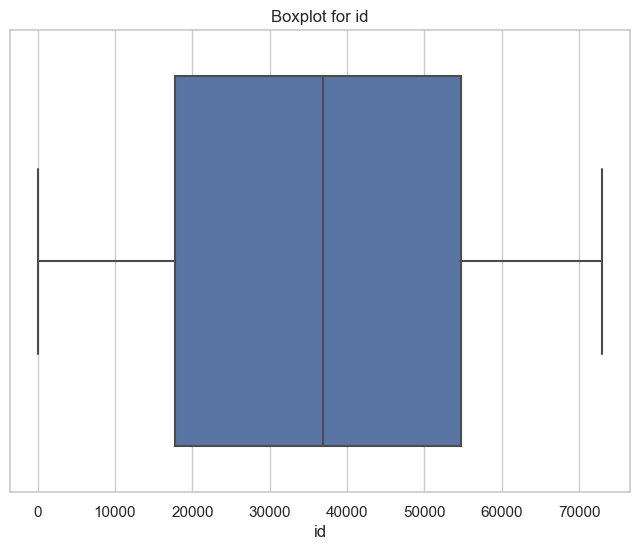

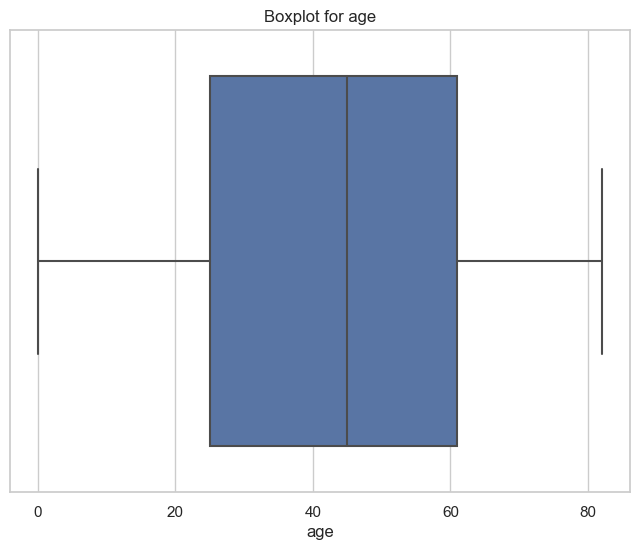

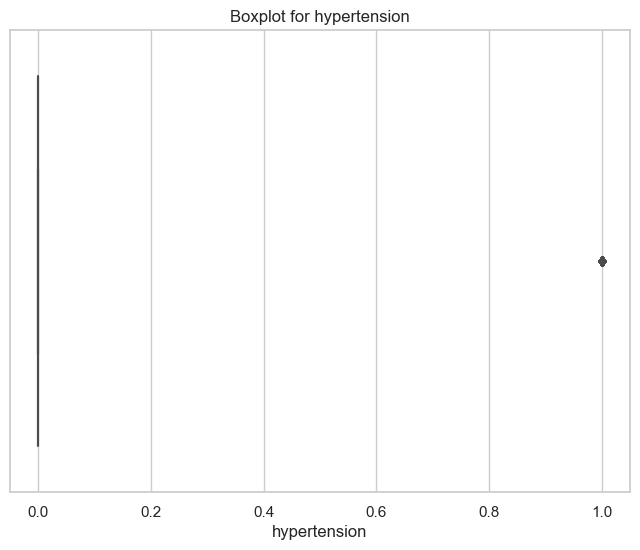

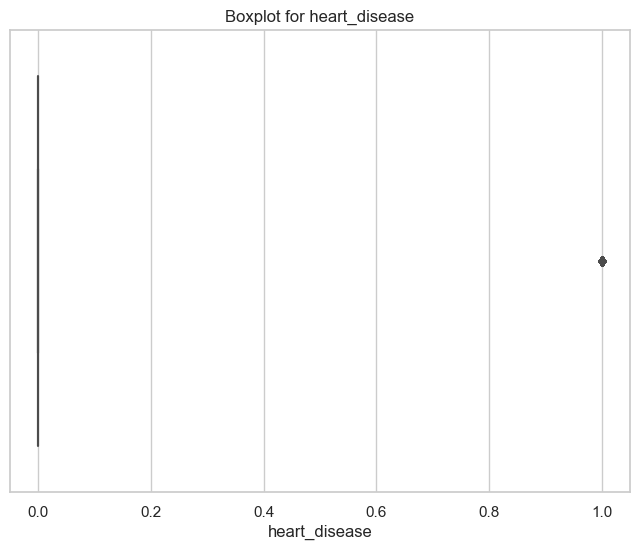

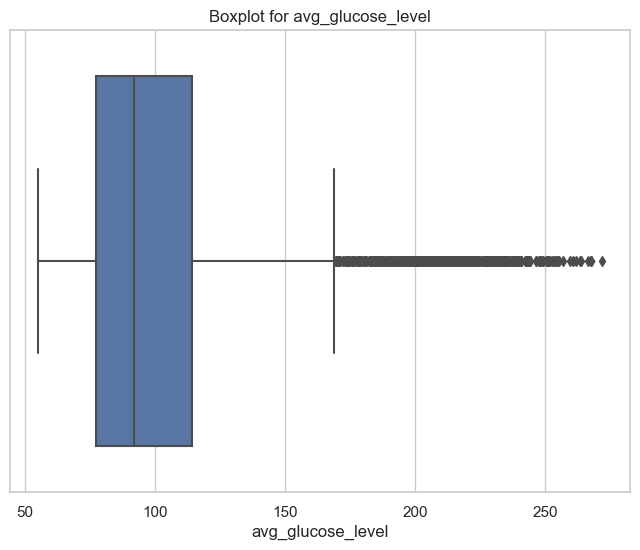

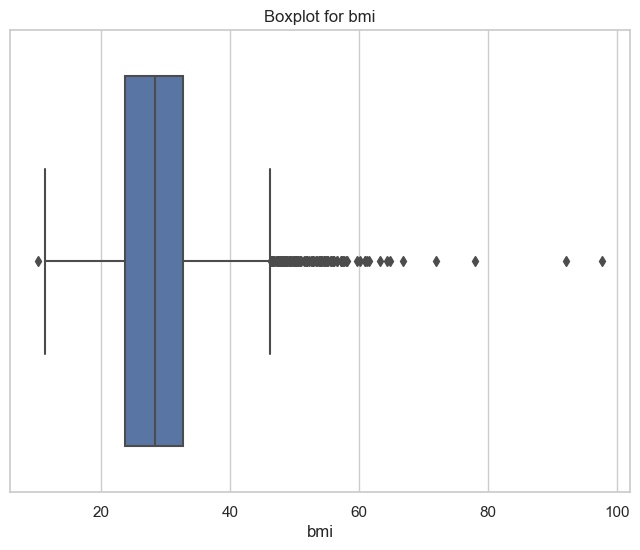

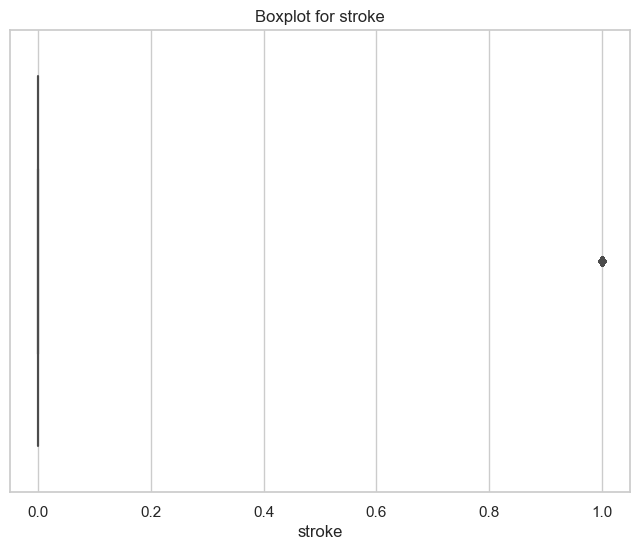

In [24]:


def check_outliers(data):
   
    
    # Select only numerical columns
    numerical_features = data.select_dtypes(include=['number']).columns.tolist()

    # Set the style of seaborn for better visualization
    sns.set(style="whitegrid")

    # Plot boxplots for each numerical feature
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[feature])
        plt.title(f'Boxplot for {feature}')
        plt.show()


check_outliers(df)


## handeling outliers

In [25]:
df=df.copy()

#### binning the age features

<Axes: xlabel='stroke', ylabel='age'>

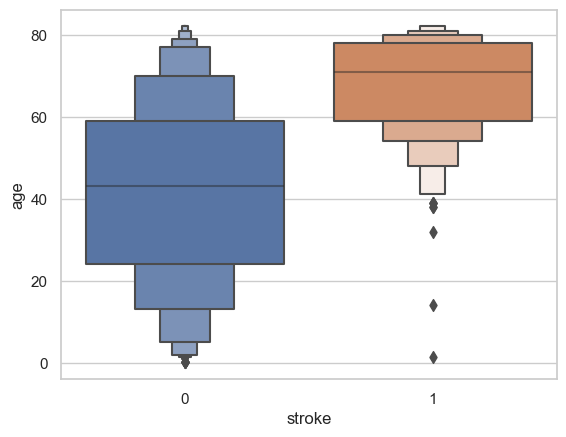

In [26]:
sns.boxenplot(x='stroke',y='age',data=df)

### capture pattern in age  the for ml . performing the binning

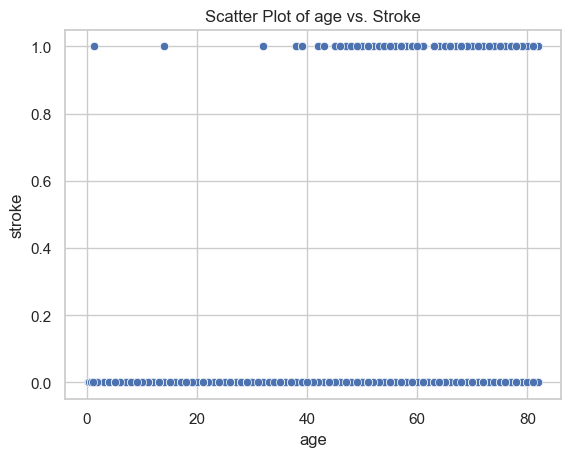

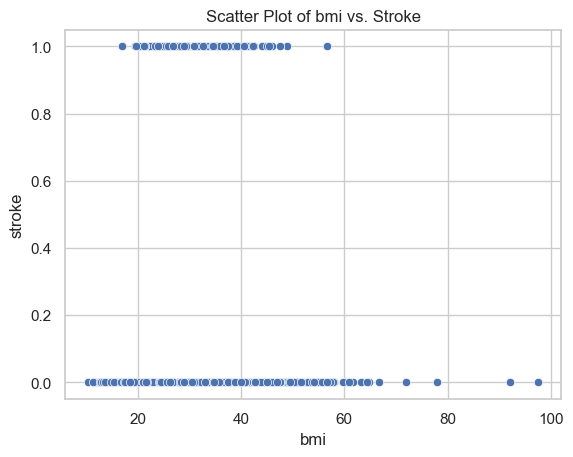

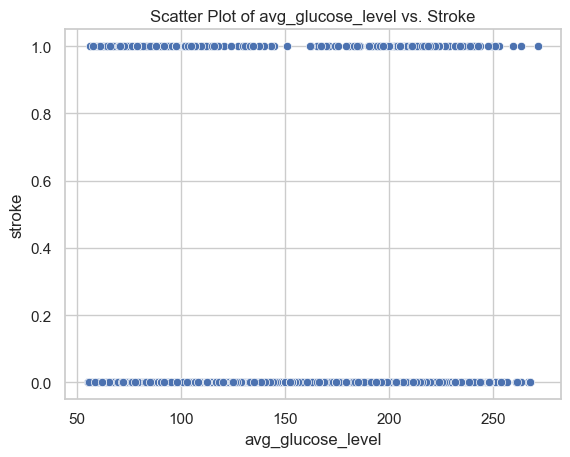

In [27]:
check_linear_ship=['age','bmi','avg_glucose_level']
for column in check_linear_ship:
    sns.scatterplot(x=column, y='stroke', data=df)
    plt.title(f'Scatter Plot of {column} vs. Stroke')
    plt.show()

#### there is any linear relationship ship b/w age and target .so binning into catgorical features

### age


In [34]:
def binning_age(df):
# Define the bins and labels
    bins = [0,20, 40, 60, 80, 100]  # Define the age bin boundaries
    labels = ['Child', 'men', 'Middle_aged', 'Senior','Super_senior']   # Labels for the bins

# Create a new column 'AgeGroup' based on binning with labels
    df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    return df

binning_age(df)





,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Super_senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Middle_aged
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Senior


In [37]:
# import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text



# Feature matrix X and target |variable y for 'bmi'
X_bmi = df[['bmi']]
y = df['stroke']

# Initialize a decision tree classifier for 'bmi'
tree_model_bmi = DecisionTreeClassifier(max_depth=1)
tree_model_bmi.fit(X_bmi, y)

# Visualize the decision tree split conditions for 'bmi'
tree_rules_bmi = export_text(tree_model_bmi, feature_names=['bmi'])
print("Decision Tree for BMI:")
print(tree_rules_bmi)

# Use the decision tree to predict for 'bmi' and assign bins based on splits
df['bmi_bin'] = tree_model_bmi.predict(X_bmi)

# Feature matrix X and target variable y for 'avg_glucose_level'
X_avg_glucose_level = df[['avg_glucose_level']]

# Initialize a decision tree classifier for 'avg_glucose_level'
tree_model_glucose = DecisionTreeClassifier(max_depth=1)
tree_model_glucose.fit(X_avg_glucose_level, y)

# Visualize the decision tree split conditions for 'avg_glucose_level'
tree_rules_glucose = export_text(tree_model_glucose, feature_names=['avg_glucose_level'])
print("\nDecision Tree for Avg Glucose Level:")
print(tree_rules_glucose)

# Use the decision tree to predict for 'avg_glucose_level' and assign bins based on splits
df['glucose_bin'] = tree_model_glucose.predict(X_avg_glucose_level)

# Display the resulting DataFrame
print("\nResulting DataFrame:")
print(df[[ 'bmi', 'avg_glucose_level', 'stroke', 'bmi_bin', 'glucose_bin']])


Decision Tree for BMI:
|--- bmi <= 26.05
|   |--- class: 0
|--- bmi >  26.05
|   |--- class: 0


Decision Tree for Avg Glucose Level:
|--- avg_glucose_level <= 162.04
|   |--- class: 0
|--- avg_glucose_level >  162.04
|   |--- class: 0


Resulting DataFrame:
            bmi  avg_glucose_level  stroke  bmi_bin  glucose_bin
0     36.600000             228.69       1        0            0
1     28.893237             202.21       1        0            0
2     32.500000             105.92       1        0            0
3     34.400000             171.23       1        0            0
4     24.000000             174.12       1        0            0
...         ...                ...     ...      ...          ...
5105  28.893237              83.75       0        0            0
5106  40.000000             125.20       0        0            0
5107  30.600000              82.99       0        0            0
5108  25.600000             166.29       0        0            0
5109  26.200000           

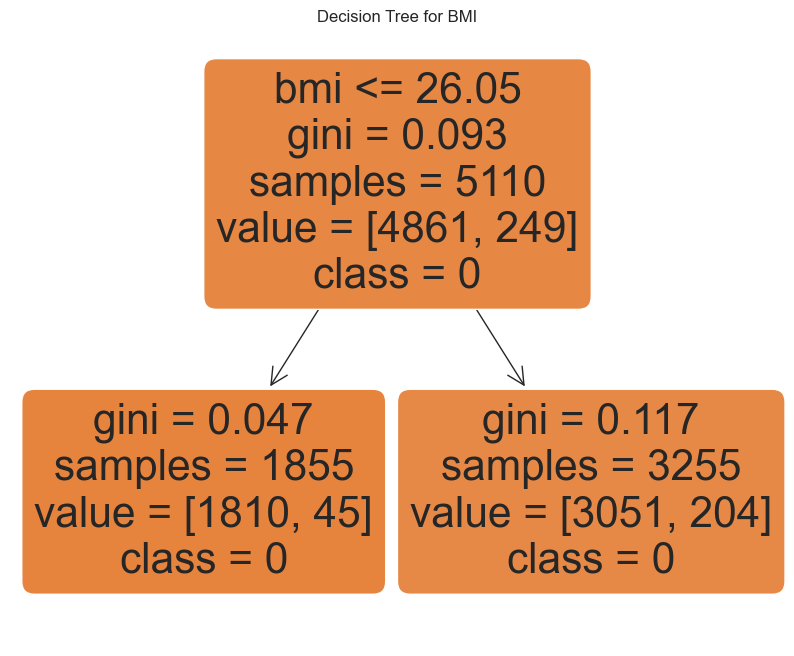

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'tree_model_bmi' is the decision tree model for 'bmi'
plt.figure(figsize=(10, 8))
plot_tree(tree_model_bmi, feature_names=['bmi'], class_names=['0', '1'], filled=True, rounded=True)
plt.title("Decision Tree for BMI")
plt.show()


In [39]:
import pandas as pd



# Function to apply binning based on the decision tree splits
def apply_binning(feature_values, split_threshold):
    return ['bin_1' if value <= split_threshold else 'bin_2' for value in feature_values]

# Applying binning for 'bmi' based on the decision tree split
bmi_threshold = 26.05
df['bmi_bin'] = apply_binning(df['bmi'], bmi_threshold)

# Applying binning for 'avg_glucose_level' based on the decision tree split
glucose_threshold = 162.04
df['glucose_bin'] = apply_binning(df['avg_glucose_level'], glucose_threshold)

# Display the resulting DataFrame
#print(df[['Name', 'bmi', 'bmi_bin', 'avg_glucose_level', 'glucose_bin', 'stroke']])


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,bmi_bin,glucose_bin
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Senior,bin_2,bin_2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Senior,bin_2,bin_2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Super_senior,bin_2,bin_1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Middle_aged,bin_2,bin_2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Senior,bin_1,bin_2


In [33]:
df=df.copy()
def drop_binning_col(df):
    df.drop(['bmi','avg_glucose_level','age'],axis=1,inplace=True)
    return df
drop_binning_col(df)

df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,AgeGroup,bmi_bin,glucose_bin
0,9046,Male,0,1,Yes,Private,Urban,formerly smoked,1,Senior,bin_2,bin_2
1,51676,Female,0,0,Yes,Self-employed,Rural,never smoked,1,Senior,bin_2,bin_2
2,31112,Male,0,1,Yes,Private,Rural,never smoked,1,Super_senior,bin_2,bin_1
3,60182,Female,0,0,Yes,Private,Urban,smokes,1,Middle_aged,bin_2,bin_2
4,1665,Female,1,0,Yes,Self-employed,Rural,never smoked,1,Senior,bin_1,bin_2


### categoricla encodeing

In [34]:


def count_categories(data, categorical_features):
    
    count_results = {}

    for feature in categorical_features:
        if pd.api.types.is_categorical_dtype(data[feature]) or pd.api.types.is_object_dtype(data[feature]):
            category_counts = data[feature].value_counts()
            count_results[feature] = category_counts

    return count_results

categorical_features=df.select_dtypes(include=object)
categorical_features = categorical_features.columns.tolist()
counts = count_categories(df, categorical_features)

# Display the counts
for feature, count in counts.items():
    print(f"Counts for {feature}:\n{count}\n")


Counts for gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Counts for ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64

Counts for work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Counts for Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Counts for smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Counts for bmi_bin:
bin_2    3255
bin_1    1855
Name: bmi_bin, dtype: int64

Counts for glucose_bin:
bin_1    4451
bin_2     659
Name: glucose_bin, dtype: int64



In [35]:
categorical_fe= df.select_dtypes(include='object').columns.tolist()
categorical_fe

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'bmi_bin',
 'glucose_bin']

## convert categocial to numerical 

### one hot encodeing 

In [36]:
from sklearn.preprocessing import OneHotEncoder # perform get_dummy method
dumies=pd.get_dummies(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
dumies

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [37]:
#concat
merge_df=pd.concat([df,dumies],axis='columns')
pd.set_option('display.max_columns',None)
merge_df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,AgeGroup,bmi_bin,glucose_bin,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,0,1,Yes,Private,Urban,formerly smoked,1,Senior,bin_2,bin_2,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,Female,0,0,Yes,Self-employed,Rural,never smoked,1,Senior,bin_2,bin_2,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,Male,0,1,Yes,Private,Rural,never smoked,1,Super_senior,bin_2,bin_1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,Female,0,0,Yes,Private,Urban,smokes,1,Middle_aged,bin_2,bin_2,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,Female,1,0,Yes,Self-employed,Rural,never smoked,1,Senior,bin_1,bin_2,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [38]:
final=merge_df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis='columns')
final

,id,hypertension,heart_disease,stroke,AgeGroup,bmi_bin,glucose_bin,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,1,1,Senior,bin_2,bin_2,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,0,0,1,Senior,bin_2,bin_2,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,0,1,1,Super_senior,bin_2,bin_1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,0,0,1,Middle_aged,bin_2,bin_2,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,1,0,1,Senior,bin_1,bin_2,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,0,0,Super_senior,bin_2,bin_1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,44873,0,0,0,Super_senior,bin_2,bin_1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,19723,0,0,0,men,bin_2,bin_1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,37544,0,0,0,Middle_aged,bin_1,bin_2,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [39]:
df_=final.drop(['gender_Other','ever_married_Yes','work_type_children',
                     'Residence_type_Urban','smoking_status_smokes'],axis='columns')


In [40]:
from sklearn.preprocessing import OneHotEncoder # perform get_dummy method

def hot_encodeing(data):
    dumies=pd.get_dummies(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
    #concat
    merge_df=pd.concat([df,dumies],axis='columns')
    #pd.set_option('display.max_columns',None)
    final=merge_df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis='columns')
    df_=final.drop(['gender_Other','ever_married_Yes','work_type_children',
                     'Residence_type_Urban','smoking_status_smokes'],axis='columns')
    df=df_
    hot_encodeing(df)
    

In [41]:
df=df_
df

,id,hypertension,heart_disease,stroke,AgeGroup,bmi_bin,glucose_bin,gender_Female,gender_Male,ever_married_No,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked
0,9046,0,1,1,Senior,bin_2,bin_2,0,1,0,0,0,1,0,0,0,1,0
1,51676,0,0,1,Senior,bin_2,bin_2,1,0,0,0,0,0,1,1,0,0,1
2,31112,0,1,1,Super_senior,bin_2,bin_1,0,1,0,0,0,1,0,1,0,0,1
3,60182,0,0,1,Middle_aged,bin_2,bin_2,1,0,0,0,0,1,0,0,0,0,0
4,1665,1,0,1,Senior,bin_1,bin_2,1,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,0,0,Super_senior,bin_2,bin_1,1,0,0,0,0,1,0,0,0,0,1
5106,44873,0,0,0,Super_senior,bin_2,bin_1,1,0,0,0,0,0,1,0,0,0,1
5107,19723,0,0,0,men,bin_2,bin_1,1,0,0,0,0,0,1,1,0,0,1
5108,37544,0,0,0,Middle_aged,bin_1,bin_2,0,1,0,0,0,1,0,1,0,1,0


### label encodeing

In [42]:
def label_encoding(data):
    # Define a mapping for categories to numerical values
    bmi_mapping = {'bin_1': 1, 'bin_2': 2}
    glucose_mapping = {'bin_1': 1, 'bin_2': 2}
    agegroup_mapping = {'Middle_aged': 1,
                        'men': 2,
                        'Senior': 3,
                        'Child': 4,
                        'Super_senior': 5}

    # Apply mapping to 'bmi_bin' and 'glucose_bin'
    data['bmi_numerical'] = data['bmi_bin'].map(bmi_mapping)
    data['glucose_numerical'] = data['glucose_bin'].map(glucose_mapping)
    data['AgeGroup'] = data['AgeGroup'].map(agegroup_mapping)
    data.drop(['bmi_bin','glucose_bin'],axis=1,inplace=True)

    return data

# Apply label encoding to the DataFrame
df_encoded = label_encoding(df)

In [43]:
df.head()

,id,hypertension,heart_disease,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,bmi_numerical,glucose_numerical
0,9046,0,1,1,3,0,1,0,0,0,1,0,0,0,1,0,2,2
1,51676,0,0,1,3,1,0,0,0,0,0,1,1,0,0,1,2,2
2,31112,0,1,1,5,0,1,0,0,0,1,0,1,0,0,1,2,1
3,60182,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,2,2
4,1665,1,0,1,3,1,0,0,0,0,0,1,1,0,0,1,1,2


## feature scaleing based on ml models 

### standardization or normalization

In [44]:
'''from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform()'''

'from sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\nX_scaled = scaler.fit_transform()'

## FEATURE SELECTION


###  CORRELATION

In [45]:
corr_matrix=df_.corr()
corr_matrix

,id,hypertension,heart_disease,stroke,gender_Female,gender_Male,ever_married_No,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,bmi_numerical,glucose_numerical
id,1.000000,0.003550,-0.001296,0.006388,-0.002144,0.001776,-0.013690,-0.000016,0.005459,0.023698,-0.019956,0.001403,-0.019243,0.007812,0.011426,-0.012299,0.003273
hypertension,0.003550,1.000000,0.108306,0.127904,-0.021143,0.021275,-0.164243,0.017685,-0.021608,-0.005413,0.115442,0.007913,-0.141501,0.058853,0.065063,0.150640,0.202341
heart_disease,-0.001296,0.108306,1.000000,0.134914,-0.085617,0.085717,-0.114644,0.001330,-0.015712,0.000027,0.086760,-0.003092,-0.066731,0.066804,-0.021856,0.092165,0.174117
stroke,0.006388,0.127904,0.134914,1.000000,-0.009027,0.009117,-0.108340,0.002677,-0.014882,0.011888,0.062168,-0.015458,-0.055892,0.064556,-0.004129,0.085798,0.154280
gender_Female,-0.002144,-0.021143,-0.085617,-0.009027,1.000000,-0.999597,-0.030483,0.016685,-0.011469,0.032294,0.026143,-0.006340,-0.059393,-0.043603,0.099111,-0.052991,-0.048737
gender_Male,0.001776,0.021275,0.085717,0.009117,-0.999597,1.000000,0.029936,-0.016534,0.011496,-0.032639,-0.025971,0.005937,0.059658,0.042738,-0.098813,0.053521,0.048894
ever_married_No,-0.013690,-0.164243,-0.114644,-0.108340,-0.030483,0.029936,1.000000,-0.134041,0.090838,-0.153830,-0.192716,0.006261,0.332081,-0.171256,-0.102845,-0.360864,-0.174049
work_type_Govt_job,-0.000016,0.017685,0.001330,0.002677,0.016685,-0.016534,-0.134041,1.000000,-0.025258,-0.444420,-0.167810,-0.013131,-0.097418,0.029686,0.046908,0.074772,0.023150
work_type_Never_worked,0.005459,-0.021608,-0.015712,-0.014882,-0.011469,0.011496,0.090838,-0.025258,1.000000,-0.076081,-0.028728,-0.022859,0.008804,-0.030095,0.036238,-0.037379,-0.025302
work_type_Private,0.023698,-0.005413,0.000027,0.011888,0.032294,-0.032639,-0.153830,-0.444420,-0.076081,1.000000,-0.505475,0.018173,-0.210013,0.025526,0.104860,0.176705,0.016268


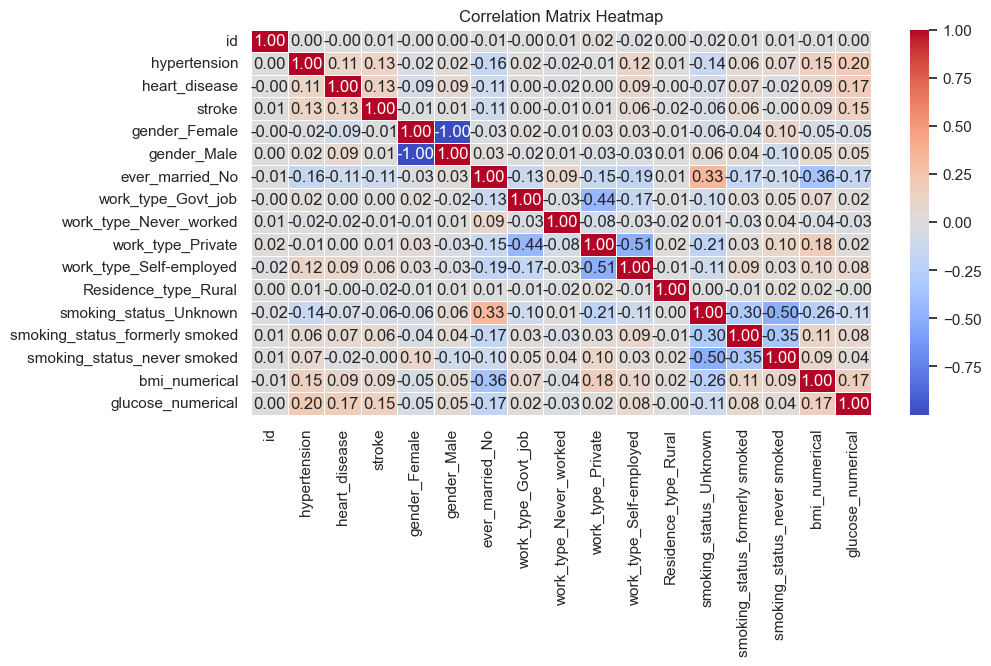

In [46]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [47]:
df.drop('id',axis=1,inplace=True)
df.head()

,hypertension,heart_disease,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,bmi_numerical,glucose_numerical
0,0,1,1,3,0,1,0,0,0,1,0,0,0,1,0,2,2
1,0,0,1,3,1,0,0,0,0,0,1,1,0,0,1,2,2
2,0,1,1,5,0,1,0,0,0,1,0,1,0,0,1,2,1
3,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,2,2
4,1,0,1,3,1,0,0,0,0,0,1,1,0,0,1,1,2


In [48]:
df_X=df.drop('stroke',axis=1)
df_X.head(2)

,hypertension,heart_disease,AgeGroup,gender_Female,gender_Male,ever_married_No,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,bmi_numerical,glucose_numerical
0,0,1,3,0,1,0,0,0,1,0,0,0,1,0,2,2
1,0,0,3,1,0,0,0,0,0,1,1,0,0,1,2,2


In [49]:
df_Y=df['stroke']
df_Y.head(2)

0    1
1    1
Name: stroke, dtype: int64

###  make pipeline

In [50]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load a sample dataset 
X = df_X
y = df_Y.values  # Convert y to a NumPy array

# Initialize the classifier (replace this with your own classifier)
classifier = DecisionTreeClassifier()

# Define the number of splits for cross-validation
n_splits = 5

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store the accuracy scores for each fold
accuracy_scores = []

# Perform Stratified k-fold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the accuracy scores for each fold
for i, accuracy in enumerate(accuracy_scores):
    print(f'Fold {i + 1}: Accuracy = {accuracy}')

# Calculate and print the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / n_splits
print(f'\nAverage Accuracy: {average_accuracy}')


#This modification should ensure that `y` is compatible with the `split` function. Note the use of `.values` when assigning `y`, and the adjustment in accessing `X_train` and `X_test` with `.iloc`.

Fold 1: Accuracy = 0.9363992172211351
Fold 2: Accuracy = 0.9334637964774951
Fold 3: Accuracy = 0.9373776908023483
Fold 4: Accuracy = 0.9432485322896281
Fold 5: Accuracy = 0.9324853228962818

Average Accuracy: 0.9365949119373778


In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import joblib

def train_and_evaluate_models(X, y):
    # Initialize classifiers
    decision_tree_model = DecisionTreeClassifier()
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    gradient_boosting_model = GradientBoostingClassifier()
    svm_model = SVC(probability=True)  # SVM needs probability for AUC-ROC

    # Create a dictionary of classifiers
    classifiers = {
        'Decision Tree': decision_tree_model,
        'Random Forest': random_forest_model,
        'Gradient Boosting': gradient_boosting_model,
        'SVM': svm_model
    }

    # Define the number of splits for cross-validation
    n_splits = 5

    # Initialize StratifiedKFold
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Perform Stratified k-fold cross-validation
    for model_name, model in classifiers.items():
        accuracy_scores = []  # Lists to store the accuracy scores for each fold

        for train_index, test_index in stratified_kfold.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Fit the classifier on the training data
            model.fit(X_train, y_train)

            # Make predictions on the test data
            y_pred = model.predict(X_test)

            # Calculate accuracy and store it
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_scores.append(accuracy)

        # Print the accuracy scores for each fold
        for i, accuracy in enumerate(accuracy_scores):
            print(f'{model_name} Fold {i + 1}: Accuracy = {accuracy}')

        # Calculate and print the average accuracy across all folds
        average_accuracy = sum(accuracy_scores) / n_splits
        print(f'{model_name} Average Accuracy: {average_accuracy}\n')

        # Save the trained model to a pickle file
        model_filename = f'{model_name.lower().replace(" ", "_")}_model.pkl'
        joblib.dump(model, model_filename)
        print(f'{model_name} Model saved to {model_filename}\n')

# Assuming df_X and df_Y are your feature and target DataFrames
train_and_evaluate_models(df_X, df_Y.values)

Decision Tree Fold 1: Accuracy = 0.9354207436399217
Decision Tree Fold 2: Accuracy = 0.9324853228962818
Decision Tree Fold 3: Accuracy = 0.9334637964774951
Decision Tree Fold 4: Accuracy = 0.9422700587084148
Decision Tree Fold 5: Accuracy = 0.9334637964774951
Decision Tree Average Accuracy: 0.9354207436399216

Decision Tree Model saved to decision_tree_model.pkl

Random Forest Fold 1: Accuracy = 0.9422700587084148
Random Forest Fold 2: Accuracy = 0.9383561643835616
Random Forest Fold 3: Accuracy = 0.9393346379647749
Random Forest Fold 4: Accuracy = 0.949119373776908
Random Forest Fold 5: Accuracy = 0.9422700587084148
Random Forest Average Accuracy: 0.942270058708415

Random Forest Model saved to random_forest_model.pkl

Gradient Boosting Fold 1: Accuracy = 0.9510763209393346
Gradient Boosting Fold 2: Accuracy = 0.9461839530332681
Gradient Boosting Fold 3: Accuracy = 0.9500978473581213
Gradient Boosting Fold 4: Accuracy = 0.949119373776908
Gradient Boosting Fold 5: Accuracy = 0.94814090

### Selecting the right model for binary classification involves considering factors such as the nature of your data, the characteristics of your problem, and the performance requirements. Here are some popular models for binary classification along with guidelines on when to use them:

1. **Logistic Regression:**
   - Use when the relationship between features and the binary outcome is assumed to be linear.
   - Suitable for problems where interpretability is important.
   - Good for baseline performance.

2. **Decision Trees:**
   - Useful when the relationship between features and the target variable is nonlinear and complex.
   - Automatically handles feature interactions.
   - Prone to overfitting, so consider using ensemble methods like Random Forests or Gradient Boosting.

3. **Random Forest:**
   - Ensemble method that builds multiple decision trees and combines their predictions.
   - Robust and less prone to overfitting compared to individual decision trees.
   - Handles both numerical and categorical features well.

4. **Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost):**
   - Ensemble method that builds trees sequentially, each correcting the errors of the previous one.
   - Often provides high predictive accuracy.
   - Tends to perform well even with default hyperparameters.

5. **Support Vector Machines (SVM):**
   - Suitable for both linear and nonlinear relationships between features and target variable.
   - Effective in high-dimensional spaces.
   - Works well for small to medium-sized datasets.

6. **Neural Networks:**
   - Effective for complex, high-dimensional data.
   - Requires large amounts of data for training and may be computationally intensive.
   - Can capture intricate patterns but may lack interpretability.

7. **K-Nearest Neighbors (KNN):**
   - Simple and intuitive algorithm.
   - Effective when the decision boundary is irregular.
   - Sensitive to outliers and may be computationally expensive for large datasets.

8. **Naive Bayes:**
   - Assumes independence between features, making it less suitable for highly correlated features.
   - Efficient and computationally inexpensive.
   - Good choice for text classification or when the independence assumption holds.

When selecting a model, it's important to consider the trade-off between interpretability, predictive accuracy, and computational complexity. Additionally, it's advisable to experiment with multiple models and evaluate their performance using metrics like accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC) to get a comprehensive understanding of how well they perform on your specific problem. Cross-validation can also help assess the generalization performance of the models.

### Hyperparameter Tuning:
- Fine-tuned hyperparameters using grid search for Random Forest and Gradient Boosting.


## Model Evaluatio

- Evaluated model performance on the testing set using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - Area Under the ROC Curve (AUC-ROC)

### makeing pipeline

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import FunctionTransformer
import pandas as pd


pipeline = Pipeline([
    ('step1_binning_age', FunctionTransformer(binning_age)),
    ('step2_apply_binning', FunctionTransformer(apply_binning)),
    ('step3_binning_col', FunctionTransformer(drop_binning_col)),
      ('step4_hotencodeing_get_dummies',FunctionTransformer(hot_encodeing)),
      ('step5_label_encodeing', FunctionTransformer(label_encoding)),
      ('step6_tain_model', FunctionTransformer(train_and_evaluate_models)),
      
      
      
    # Add more steps as needed
])

# Example usage of the pipeline

pipeline.fit(data)
result = pipeline.transform(data)  # or pipeline.predict(data) depending on your use case


NameError: name 'Pipeline' is not defined

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


df_Y = df_X['stroke']
df_X = df_X.drop('stroke', axis=1)

# Function 1: Binning Age

    # Implementation for step 1
    def binning_age(data):
    # Define the bins and labels
    bins = [0, 20, 40, 60, 80, 100]  # Define the age bin boundaries
    labels = ['Child', 'men', 'Middle_aged', 'Senior', 'Super_senior']  # Labels for the bins

    # Create a new column 'AgeGroup' based on binning with labels
    data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
    return data
# Assuming 'df' is your DataFrame
df = binning_age(df)
    

# Function 2: Apply Binning

    # Implementation for step 2
    def apply_binning(df, feature_column, split_threshold, bin_column):
    df[bin_column] = ['bin_1' if value <= split_threshold else 'bin_2' for value in df[feature_column]]
    return df

# Applying binning for 'bmi' based on the decision tree split
bmi_threshold = 26.05
df = apply_binning(df, 'bmi', bmi_threshold, 'bmi_bin')

# Applying binning for 'avg_glucose_level' based on the decision tree split
glucose_threshold = 162.04
df = apply_binning(df, 'avg_glucose_level', glucose_threshold, 'glucose_bin')

# Display the resulting DataFrame
print(df[['Name', 'bmi', 'bmi_bin', 'avg_glucose_level', 'glucose_bin', 'stroke']])

# Function 3: Drop Binning Columns


# Implementation for step 3
  
def drop_binning_col(df):
    df.drop(['bmi','avg_glucose_level','age'],axis=1,inplace=True)
    return df
drop_binning_col(df)

df.head()
# Function 4: Hot Encoding

    # Implementation for step 4

def hot_encodeing(data):
    dumies=pd.get_dummies(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
    #concat
    merge_df=pd.concat([df,dumies],axis='columns')
    #pd.set_option('display.max_columns',None)
    final=merge_df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis='columns')
    df_=final.drop(['gender_Other','ever_married_Yes','work_type_children',
                     'Residence_type_Urban','smoking_status_smokes'],axis='columns')
    df=df_
    hot_encodeing(df)
    
# Function 5: Label Encoding
def label_encoding(data):
    # Define a mapping for categories to numerical values
    bmi_mapping = {'bin_1': 1, 'bin_2': 2}
    glucose_mapping = {'bin_1': 1, 'bin_2': 2}
    agegroup_mapping = {'Middle_aged': 1,
                        'men': 2,
                        'Senior': 3,
                        'Child': 4,
                        'Super_senior': 5}

    # Apply mapping to 'bmi_bin' and 'glucose_bin'
    data['bmi_numerical'] = data['bmi_bin'].map(bmi_mapping)
    data['glucose_numerical'] = data['glucose_bin'].map(glucose_mapping)
    data['AgeGroup'] = data['AgeGroup'].map(agegroup_mapping)
    data.drop(['bmi_bin','glucose_bin'],axis=1,inplace=True)

    return data

# Apply label encoding to the DataFrame
df_encoded = label_encoding(df)

# Function 6: Train and Evaluate Models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import joblib

def train_and_evaluate_models(X, y):
    # Initialize classifiers
    decision_tree_model = DecisionTreeClassifier()
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    gradient_boosting_model = GradientBoostingClassifier()
    svm_model = SVC(probability=True)  # SVM needs probability for AUC-ROC

    # Create a dictionary of classifiers
    classifiers = {
        'Decision Tree': decision_tree_model,
        'Random Forest': random_forest_model,
        'Gradient Boosting': gradient_boosting_model,
        'SVM': svm_model
    }

    # Define the number of splits for cross-validation
    n_splits = 5

    # Initialize StratifiedKFold
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Perform Stratified k-fold cross-validation
    for model_name, model in classifiers.items():
        accuracy_scores = []  # Lists to store the accuracy scores for each fold

        for train_index, test_index in stratified_kfold.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Fit the classifier on the training data
            model.fit(X_train, y_train)

            # Make predictions on the test data
            y_pred = model.predict(X_test)

            # Calculate accuracy and store it
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_scores.append(accuracy)

        # Print the accuracy scores for each fold
        for i, accuracy in enumerate(accuracy_scores):
            print(f'{model_name} Fold {i + 1}: Accuracy = {accuracy}')

        # Calculate and print the average accuracy across all folds
        average_accuracy = sum(accuracy_scores) / n_splits
        print(f'{model_name} Average Accuracy: {average_accuracy}\n')

        # Save the trained model to a pickle file
        model_filename = f'{model_name.lower().replace(" ", "_")}_model.pkl'
        joblib.dump(model, model_filename)
        print(f'{model_name} Model saved to {model_filename}\n')

# Assuming df_X and df_Y are your feature and target DataFrames
train_and_evaluate_models(df_X, df_Y.values)
    # ...

'''class TrainAndEvaluateModels:
    def fit(self, X, y=None):
        self.X = X
        self.y = y
        return self

    def transform(self, X):
        train_and_evaluate_models(self.X, self.y)'''

# Create a pipeline with the steps
pipeline = Pipeline([
    ('step1_binning_age', FunctionTransformer(binning_age)),
    ('step2_apply_binning', FunctionTransformer(apply_binning)),
    ('step3_binning_col', FunctionTransformer(drop_binning_col)),
    ('step4_hotencodeing_get_dummies', FunctionTransformer(hot_encodeing)),
    ('step5_label_encodeing', FunctionTransformer(label_encoding)),
    ('step6_train_model', TrainAndEvaluateModels()),  # Custom transformer
    # Add more steps as needed
])

# Example usage of the pipeline
result = pipeline.fit_transform(df_X)

In [ ]:
#Your implementation looks correct, but there are a few things to note and adjust:

#1. You've defined the functions (`binning_age`, `apply_binning`, `drop_binning_col`, `hot_encodeing`, `label_encoding`, `train_and_evaluate_models`) and applied them to the DataFrame `df` separately before creating the pipeline. In a pipeline, these transformations will be applied automatically, so you don't need to apply them manually beforehand.

32. The pipeline will work on the data you provide during the `fit_transform` step, and each step of the pipeline will transform the data accordingly.

#3. You need to make sure that your pipeline steps receive and return DataFrames correctly. The `FunctionTransformer` automatically converts DataFrames to NumPy arrays during the transformation. If your functions expect DataFrames as input, you might need to handle this conversion manually.

#3Here's an adjusted version of your code:

#```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import joblib
import pandas as pd

# Define your functions

def binning_age(data):
    # Define the bins and labels
    bins = [0, 20, 40, 60, 80, 100]
    labels = ['Child', 'men', 'Middle_aged', 'Senior', 'Super_senior']

    # Create a new column 'AgeGroup' based on binning with labels
    data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
    return data

def apply_binning(data, feature_column, split_threshold, bin_column):
    data[bin_column] = ['bin_1' if value <= split_threshold else 'bin_2' for value in data[feature_column]]
    return data

def drop_binning_col(data):
    data.drop(['bmi', 'avg_glucose_level', 'age'], axis=1, inplace=True)
    return data

def hot_encodeing(data):
    dumies = pd.get_dummies(data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
    merge_df = pd.concat([data, dumies], axis='columns')
    final = merge_df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis='columns')
    data_ = final.drop(['gender_Other', 'ever_married_Yes', 'work_type_children',
                        'Residence_type_Urban', 'smoking_status_smokes'], axis='columns')
    return data_

def label_encoding(data):
    bmi_mapping = {'bin_1': 1, 'bin_2': 2}
    glucose_mapping = {'bin_1': 1, 'bin_2': 2}
    agegroup_mapping = {'Middle_aged': 1, 'men': 2, 'Senior': 3, 'Child': 4, 'Super_senior': 5}

    data['bmi_numerical'] = data['bmi_bin'].map(bmi_mapping)
    data['glucose_numerical'] = data['glucose_bin'].map(glucose_mapping)
    data['AgeGroup'] = data['AgeGroup'].map(agegroup_mapping)
    data.drop(['bmi_bin', 'glucose_bin'], axis=1, inplace=True)

    return data

def train_and_evaluate_models(X, y):
    decision_tree_model = DecisionTreeClassifier()
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    gradient_boosting_model = GradientBoostingClassifier()
    svm_model = SVC(probability=True)

    classifiers = {
        'Decision Tree': decision_tree_model,
        'Random Forest': random_forest_model,
        'Gradient Boosting': gradient_boosting_model,
        'SVM': svm_model
    }

    n_splits = 5
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for model_name, model in classifiers.items():
        accuracy_scores = []

        for train_index, test_index in stratified_kfold.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            accuracy_scores.append(accuracy)

        for i, accuracy in enumerate(accuracy_scores):
            print(f'{model_name} Fold {i + 1}: Accuracy = {accuracy}')

        average_accuracy = sum(accuracy_scores) / n_splits
        print(f'{model_name} Average Accuracy: {average}'')